In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

df = pd.read_csv('/content/gdrive/MyDrive/personality.csv') #Gets data from CSV file located on my Google Drive
df

In [ ]:
df.shape

(128061, 9)

### **Data Cleaning**


In [ ]:
df.isnull()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
128056,False,False,False,False,False,False,False,False,False
128057,False,False,False,False,False,False,False,False,False
128058,False,False,False,False,False,False,False,False,False
128059,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Education,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Interest,0
Personality,0


<Axes: >

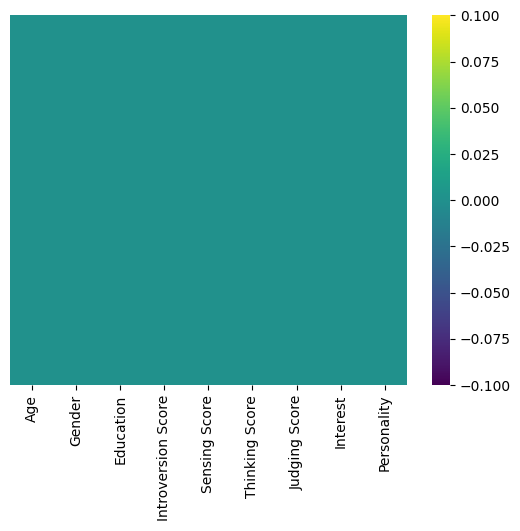

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = "viridis")

In [ ]:
df.tail()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ
128060,27.0,Male,0,7.78827,4.770737,3.18600,6.204355,Others,ENFJ


In [ ]:
df.tail().isnull()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
128056,False,False,False,False,False,False,False,False,False
128057,False,False,False,False,False,False,False,False,False
128058,False,False,False,False,False,False,False,False,False
128059,False,False,False,False,False,False,False,False,False
128060,False,False,False,False,False,False,False,False,False


In [ ]:
unique_values = df['Interest'].unique()

unique_values


array(['Unknown', 'Sports', 'Others', 'Technology', 'Arts'], dtype=object)

In [ ]:
newDF = df[df['Interest'] != 'Unknown']

newDF


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
5,25.0,Male,0,7.66292,5.758030,1.97014,4.563907,Others,ENFP
7,27.0,Female,0,5.24958,5.963290,1.16176,5.873350,Sports,ENFJ
...,...,...,...,...,...,...,...,...,...
128054,24.0,Female,0,2.62070,5.871295,3.15414,6.237609,Technology,INFJ
128055,38.0,Male,1,5.18969,5.511788,9.69071,4.456348,Technology,ENTP
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP


In [ ]:
newDF.isin(["Unknown	"]).sum()


,0
Age,0
Gender,0
Education,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Interest,0
Personality,0


In [ ]:
unique_values = newDF['Interest'].unique()

unique_values

array(['Sports', 'Others', 'Technology', 'Arts'], dtype=object)

In [ ]:
newDF.shape

(79226, 9)

### **Model Building**

Gonna use Random forest machine learning algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Select relevant features and target variable
X = newDF[['Age', 'Gender', 'Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score', 'Interest']]
y = newDF['Personality']

In [ ]:
# Convert categorical variable 'Gender' to numerical using .loc
X.loc[:, 'Gender'] = X['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
# Convert categorical variable 'Interest' to numerical using .loc
X.loc[:, 'Interest'] = X['Interest'].map({'Sports': 1, 'Others': 2, 'Technology': 3, 'Arts': 4})
# ['Sports', 'Others', 'Technology', 'Arts'] -> [1,2,3,4]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test

,Age,Gender,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest
18546,31.0,1,5.06812,6.273369,3.61217,6.147453,4
116991,35.0,0,3.93992,5.846738,2.32758,4.412642,1
88790,28.0,0,6.47297,6.424337,3.98508,4.054929,1
5506,36.0,0,3.08625,5.287995,3.20139,2.137014,2
43043,41.0,0,4.64637,5.542900,1.56214,5.214330,4
...,...,...,...,...,...,...,...
86185,25.0,0,2.02686,5.236450,4.77971,4.983145,4
46867,22.0,0,3.97901,3.935694,6.41126,1.442338,2
292,21.0,1,4.54029,5.317119,6.46669,4.194244,3
15542,20.0,0,5.81545,5.847374,2.99768,3.660347,4


In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

### **Model Training**

In [ ]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
y_pred

array(['ESFJ', 'ENFP', 'ESFP', ..., 'INFP', 'ENFP', 'ENFP'], dtype=object)

### **Model Evaluation**

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report: {classification_rep}")

Accuracy: 0.82
Classification Report:               precision    recall  f1-score   support

        ENFJ       0.50      0.66      0.57       518
        ENFP       0.89      0.86      0.88      4191
        ENTJ       0.53      0.61      0.57       399
        ENTP       0.88      0.87      0.87      3113
        ESFJ       0.56      0.53      0.55        79
        ESFP       0.83      0.79      0.81       585
        ESTJ       0.41      0.46      0.43        54
        ESTP       0.81      0.78      0.80       411
        INFJ       0.57      0.59      0.58       397
        INFP       0.85      0.86      0.86      2929
        INTJ       0.52      0.63      0.57       267
        INTP       0.85      0.84      0.84      2107
        ISFJ       0.41      0.39      0.40        49
        ISFP       0.76      0.77      0.76       416
        ISTJ       0.47      0.47      0.47        30
        ISTP       0.80      0.75      0.78       301

    accuracy                           0.8

In [ ]:
def personalityPrediction(Age,Gender, Introversion_Score, Sensing_Score, Thinking_Score, Judging_Score, Interest):


  try:
    Age = int(input("Enter age: "))
  except ValueError:
    print("Invalid input. Age must be a number.")


  Gender = input("Enter gender (Male/Female): ").strip().capitalize()
  if Gender == 'Female':
    Gender = 0
  elif Gender == 'Male':
    Gender = 1
  else:
    print("Invalid input. Please enter 'Male' or 'Female'.")


  try:
    Introversion_Score = float(input("Enter introversion score: "))
  except ValueError:
    print("Invalid input. Introversion score must be a score (0-100)")


  try:
    Sensing_Score = float(input("Enter sensing score: "))
  except ValueError:
    print("Invalid input. Sensing score must be a score (0-100)")


  try:
    Thinking_Score = float(input("Enter thinking score: "))
  except ValueError:
    print("Invalid input. Thinking score must be a score (0-100)")



  try:
    Judging_Score = float(input("Enter judging score: "))
  except ValueError:
    print("Invalid input. Judging score must be a score (0-100)")



  Interest = input("Enter interest ('Sports', 'Others', 'Technology', 'Arts'): ").strip().capitalize()
  if Interest == 'Sports':
    Interest = 1
  elif Interest == 'Others':
    Interest = 2
  elif Interest == 'Technology':
    Interest = 3
  elif Interest == 'Arts':
    Interest = 4
  else:
    print("Invalid input. Please enter 'Sports', 'Others', 'Technology', 'Arts'.")
# ['Sports', 'Others', 'Technology', 'Arts'] -> [1,2,3,4]


  features = [Age,Gender, Introversion_Score, Sensing_Score, Thinking_Score, Judging_Score, Interest]

  prediction = rf_classifier.predict([features])
  print(f"This Machine Learning RandomForest alorgithm predicts that your personality is {prediction}")




In [ ]:
def Prediction(Age,Gender, Introversion_Score, Sensing_Score, Thinking_Score, Judging_Score, Interest):


  try:
    Age = int(input("Enter age: "))
  except ValueError:
    print("Invalid input. Age must be a number.")


  Gender = input("Enter gender (Male/Female): ").strip().capitalize()
  if Gender == 'Female':
    Gender = 0
  elif Gender == 'Male':
    Gender = 1
  else:
    print("Invalid input. Please enter 'Male' or 'Female'.")


  try:
    Introversion_Score = float(input("Enter introversion score: "))
  except ValueError:
    print("Invalid input. Introversion score must be a score (0-100)")


  try:
    Sensing_Score = float(input("Enter sensing score: "))
  except ValueError:
    print("Invalid input. Sensing score must be a score (0-100)")


  try:
    Thinking_Score = float(input("Enter thinking score: "))
  except ValueError:
    print("Invalid input. Thinking score must be a score (0-100)")



  try:
    Judging_Score = float(input("Enter judging score: "))
  except ValueError:
    print("Invalid input. Judging score must be a score (0-100)")



  Interest = input("Enter interest ('Sports', 'Others', 'Technology', 'Arts'): ").strip().capitalize()
  if Interest == 'Sports':
    Interest = 1
  elif Interest == 'Others':
    Interest = 2
  elif Interest == 'Technology':
    Interest = 3
  elif Interest == 'Arts':
    Interest = 4
  else:
    print("Invalid input. Please enter 'Sports', 'Others', 'Technology', 'Arts'.")
# ['Sports', 'Others', 'Technology', 'Arts'] -> [1,2,3,4]


  features = [Age,Gender, Introversion_Score, Sensing_Score, Thinking_Score, Judging_Score, Interest]

  prediction = rf_classifier.predict([features])

  return prediction[0]



In [ ]:
print(personalityPrediction(31.0, "Male", 5.06812, 6.273369, 3.61217, 6.147453, "Arts"))


"""
Test Cases:

[28.0	Male	2.01892	4.823624	7.30625	5.986550	Others] ->	INTP
[27.0	Female	5.24958	5.963290	1.16176	5.873350	Sports] ->	ENFJ
[24.0	Female	2.62070	5.871295	3.15414	6.237609	Technology] -> INFJ
[27.0	Male	7.78827	4.770737	3.18600	6.204355	Others]	-> ENFJ
[26.0	Female	8.16219	3.433857	2.45531	5.541144	Arts]	-> ENFP
"""

Enter age: 28
Enter gender (Male/Female): male
Enter introversion score: 2.01892
Enter sensing score: 4.823624
Enter thinking score: 7.30625
Enter judging score: 5.986550
Enter interest ('Sports', 'Others', 'Technology', 'Arts'): Others
This Machine Learning RandomForest alorgithm predicts that your personality is ['INTP']
None


'\nTest Cases:\n\n[28.0\tMale\t2.01892\t4.823624\t7.30625\t5.986550\tOthers] ->\tINTP\n[27.0\tFemale\t5.24958\t5.963290\t1.16176\t5.873350\tSports] ->\tENFJ\n[24.0\tFemale\t2.62070\t5.871295\t3.15414\t6.237609\tTechnology] -> INFJ\n[27.0\tMale\t7.78827\t4.770737\t3.18600\t6.204355\tOthers]\t-> ENFJ\n[26.0\tFemale\t8.16219\t3.433857\t2.45531\t5.541144\tArts]\t-> ENFP\n'

In [ ]:
! pip install gradio

In [ ]:
import gradio as gr

def greet(age, gender, introversion_score, sensing_score, thinking_score, judging_score, interest):
    # This function should contain the logic to predict personality traits.
    # Assuming personalityPrediction is a defined function that takes the input parameters.
    predictions = Prediction(age, gender, introversion_score, sensing_score, thinking_score, judging_score, interest)
    return predictions[0]

demo = gr.Interface(
    fn=greet,
    inputs=[
        gr.Slider(minimum=0, maximum=100, label="Age"),
        gr.Textbox(label="Gender"),
        gr.Slider(minimum=0, maximum=100, label="Introversion Score"),
        gr.Slider(minimum=0, maximum=100, label="Sensing Score"),
        gr.Slider(minimum=0, maximum=100, label="Thinking Score"),
        gr.Slider(minimum=0, maximum=100, label="Judging Score"),
        gr.Textbox(label="Interest")
    ],
    outputs="text",
)

demo.launch(debug=True)
"""
Test Cases:

[28.0	Male	2.01892	4.823624	7.30625	5.986550	Others] ->	INTP
[27.0	Female	5.24958	5.963290	1.16176	5.873350	Sports] ->	ENFJ
[24.0	Female	2.62070	5.871295	3.15414	6.237609	Technology] -> INFJ
[27.0	Male	7.78827	4.770737	3.18600	6.204355	Others]	-> ENFJ
[26.0	Female	8.16219	3.433857	2.45531	5.541144	Arts]	-> ENFP
"""

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://56e2b2e2ae95e26257.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
